#### **Ejercicio:** Ejercicio de Histogramas y Diagramas de caja

**Elaborado por:** Fabian Villarreal Sosa

Los datos para este ejercicio son de Data.World y poseen información sobre la posesión de perros y gatos en los Estados Unidos.

https://data.world/datanerd/cat-vs-dog-popularity-in-u-s

**Tarea**

Responde y completa lo siguiente:

1) Traza un histograma del porcentaje de poseedores de perros.

2) Traza un histograma del porcentaje de poseedores de gatos.

3a) ¿Qué podemos ver al comparar estos dos histogramas? ¿Qué información nos da?

3b) Opcional/Extra: traza estos dos histogramas en el mismo plot. A continuación, un ejemplo de cómo debería lucir:

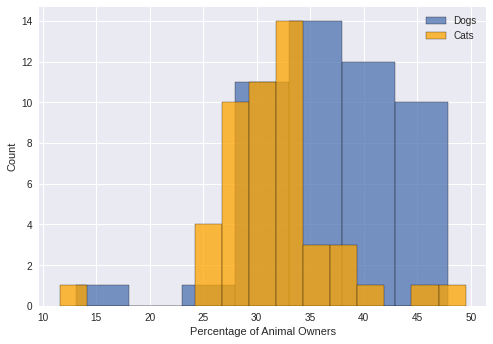

4) Crea dos diagramas de caja en el mismo plot: uno con el número medio de gatos por hogar y el otro, del número medio de perros. Más abajo, un ejemplo de cómo podría lucir:

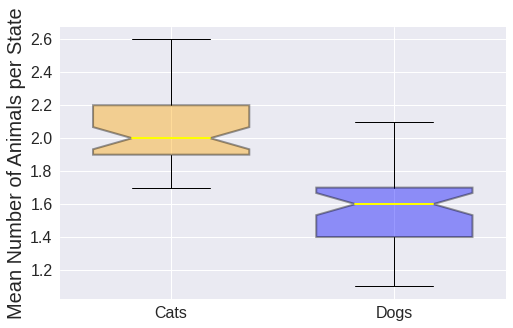

5) ¿Qué podemos ver al comparar estos dos diagramas de caja? ¿Qué información nos da?

In [1]:
### Librerias
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from google.colab import drive

In [2]:
### Acceder a directorio en Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
### Determinar directorio
os.chdir('/content/drive/MyDrive/Coding Dojo/Datos')
os.getcwd()

'/content/drive/MyDrive/Coding Dojo/Datos'

In [4]:
### Cargar los datos
df=pd.read_excel('catsvdogs.xlsx', sheet_name='States')
df.head()

,Location,Number of Households (in 1000),Percentage of households with pets,Number of Pet Households (in 1000),Percentage of Dog Owners,Dog Owning Households (1000s),Mean Number of Dogs per household,Dog Population (in 1000),Percentage of Cat Owners,Cat Owning Households,Mean Number of Cats,Cat Population
0,Alabama,1828,59.5,1088,44.1,807,1.7,1410,27.4,501,2.5,1252
1,Arizona,2515,59.5,1497,40.1,1008,1.8,1798,29.6,743,1.9,1438
2,Arkansas,1148,62.4,716,47.9,550,2.0,1097,30.6,351,2.3,810
3,California,12974,52.9,6865,32.8,4260,1.6,6687,28.3,3687,1.9,7118
4,Colorado,1986,61.3,1217,42.5,845,1.6,1349,32.3,642,1.9,1191


In [5]:
df.shape

(49, 12)

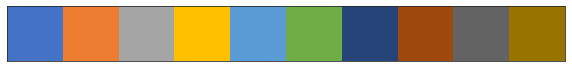

In [6]:
### Estilo de los graficos
sns.set_style('white')

### Paleta de colores Excel
my_palette=['#4472C4', '#ED7D31', '#A5A5A5', '#FFC000', '#5B9BD5', '#70AD47', '#264478', '#9E480E', '#636363', '#997300'] # Colores de Microsoft Excel
sns.palplot(sns.color_palette(my_palette, 10))

### Definir paleta
sns.set_palette(my_palette)

1 Traza un histograma del porcentaje de poseedores de perros.

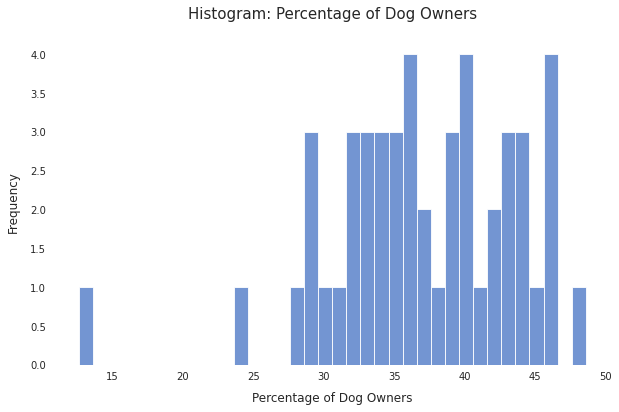

In [7]:
# Con frecuencia
sns.histplot(df['Percentage of Dog Owners'], discrete=True) # stat='percent': Poner eje-y en porcentaje
plt.title('Histogram: Percentage of Dog Owners', fontsize=15, pad=20)
plt.ylabel('Frequency', fontsize=12, labelpad=10)
plt.xlabel('Percentage of Dog Owners', fontsize=12, labelpad=10)
sns.despine(left=True, bottom=True)
plt.gcf().set_size_inches(10, 6);

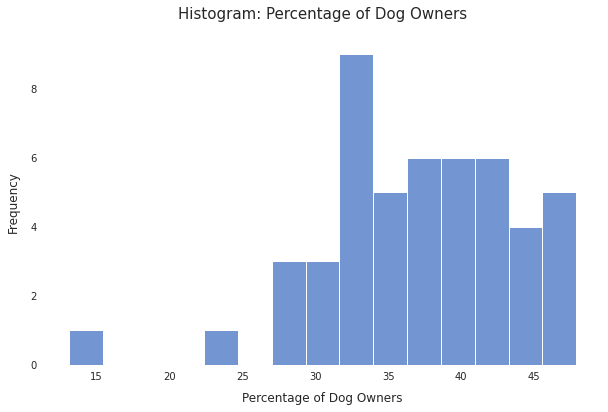

In [9]:
sns.histplot(df['Percentage of Dog Owners'], bins=15) # discrete=True: permite obtener el histograma de manera discreta
plt.title('Histogram: Percentage of Dog Owners', fontsize=15, pad=20)
plt.ylabel('Frequency', fontsize=12, labelpad=10)
plt.xlabel('Percentage of Dog Owners', fontsize=12, labelpad=10)
sns.despine(left=True, bottom=True)
plt.gcf().set_size_inches(10, 6);

2 Traza un histograma del porcentaje de poseedores de gatos

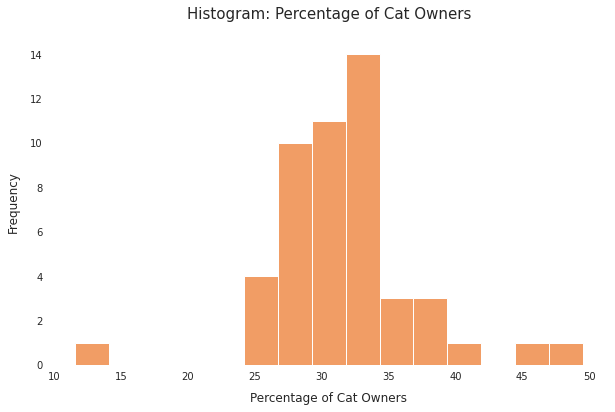

In [10]:
sns.histplot(df['Percentage of Cat Owners'], bins=15, color=my_palette[1])
plt.title('Histogram: Percentage of Cat Owners', fontsize=15, pad=20)
plt.ylabel('Frequency', fontsize=12, labelpad=10)
plt.xlabel('Percentage of Cat Owners', fontsize=12, labelpad=10)
sns.despine(left=True, bottom=True)
plt.gcf().set_size_inches(10, 6);

In [12]:
print('Promedio perros:', round(df['Percentage of Dog Owners'].mean(),2))
print('promedio gatos:', round(df['Percentage of Cat Owners'].mean(),2))

Promedio perros: 36.97
promedio gatos: 31.64


In [13]:
df[['Percentage of Dog Owners', 'Percentage of Cat Owners']].describe()

,Percentage of Dog Owners,Percentage of Cat Owners
count,49.000000,49.000000
mean,36.973469,31.642857
std,6.671169,5.683162
min,13.100000,11.600000
25%,32.900000,29.000000
50%,36.600000,31.300000
75%,42.500000,33.800000
max,47.900000,49.500000


3a ¿Qué podemos ver al comparar estos dos histogramas? ¿Qué información nos da?


In [14]:
# Los histogramas proveen información visual que sugiere que, en promedio, a lo largo de Estados Unidos, 
# existe un mayor porcentaje de hogares que poseen perros en relación con los hogares que poseen gatos.
# Especificamente, en promedio, alrededor de 37% de hogares poseen al menos un perro; mientras que, 
# alrededor del 32% de hogares poseen al menos un gato.

# Se puede observar que la distribución del porcentaje de hogares que poseen perros presenta una mayor
# acumulación al lado derecho de la distribución en relación con la distribución de los gatos.

# Por otro lado, se observa que estos porcentajes en ningún caso llega a superar el 50%, sugiriendo que 
# aproximadamente, un poco más de la mitad de hogares en los estados no poseen ni perros ni gatos.

3b. Opcional/Extra: traza estos dos histogramas en el mismo plot. A continuación, un ejemplo de cómo debería lucir:

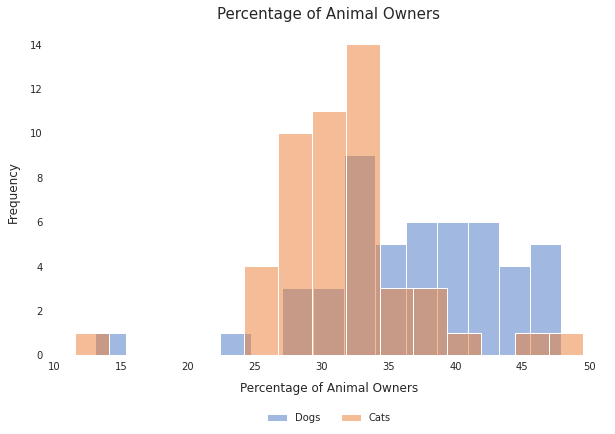

In [15]:
sns.histplot(data=df, x='Percentage of Dog Owners', bins=15, color=my_palette[0], alpha=0.5, label='Dogs')
sns.histplot(data=df, x='Percentage of Cat Owners', bins=15, color=my_palette[1], alpha=0.5, label='Cats')
plt.title('Percentage of Animal Owners', fontsize=15, pad=10)
plt.legend(title=None,
           loc='upper center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=2,
           frameon=False)
plt.ylabel('Frequency', fontsize=12, labelpad=10)
plt.xlabel('Percentage of Animal Owners', fontsize=12, labelpad=10)
sns.despine(left=True, bottom=True)
plt.gcf().set_size_inches(10, 6);

4. Crea dos diagramas de caja en el mismo plot: uno con el número medio de gatos por hogar y el otro, del número medio de perros.

In [16]:
df1=df.loc[:, ['Mean Number of Dogs per household', 'Mean Number of Cats']]
df1=df1.melt() # From wide to long
df1['variable']=df1['variable'].map({'Mean Number of Dogs per household': 'Dogs',
                                     'Mean Number of Cats': 'Cats'}) # Simplificar nombre de las categorias
df1.columns=['animal', 'mean_number']

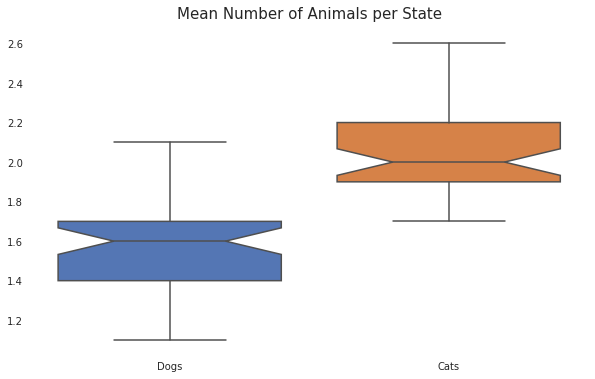

In [17]:
### Boxplot
sns.boxplot(data=df1, 
            x='animal', y='mean_number', 
            order=['Dogs', 'Cats'], 
            notch=True)
plt.title('Mean Number of Animals per State', fontsize=15, pad=10)
plt.ylabel('')
plt.xlabel('')
sns.despine(left=True, bottom=True)
plt.gcf().set_size_inches(10, 6);

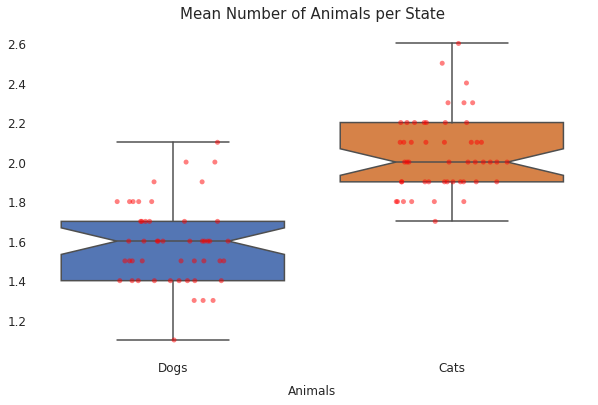

In [18]:
sns.boxplot(data=df1, 
            x='animal', y='mean_number', 
            order=['Dogs', 'Cats'], 
            notch=True)
sns.stripplot(data=df1, x='animal', y='mean_number', color='r', jitter=0.2, alpha=0.5)
plt.title('Mean Number of Animals per State', fontsize=15, pad=10)
plt.ylabel('')
plt.yticks(fontsize=12)
plt.xlabel('Animals', fontsize=12, labelpad=10)
plt.xticks(fontsize=12)
sns.despine(left=True, bottom=True)
plt.gcf().set_size_inches(10, 6);

5 ¿Qué podemos ver al comparar estos dos diagramas de caja? ¿Qué información nos da?

In [19]:
# En este caso los diagramas de caja muestran información respecto a la distribución de la cantidad de 
# perros y gatos en promedio en el hogar por estado. El diagrama de caja permite determinar el percentil 
# 25%, la mediana (percentil 50%) y el percentil 75%, adicionalmente de proveer información respecto a 
# los valores máximos y mínimos. La gráfica sugiere que al considerar el promedio de animales por hogar, 
# existe una menor cantidad de perros en relación a los gatos. Específicamente, se puede observar que la 
# mediana en cuanto a la cantidad de perros en promedio es de alrededor de 1.6 perros por hogar por estado;
# mientras que esta cifra es de alrededor de 2 gatos por hogar por estado. La muesca dentro del diagrama, 
# sugiere que las medianas difieren a un 95% de nivel de confianza.